# Iris flowers

## Introduction

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

## References

- https://www.kaggle.com/datasets/arshid/iris-flower-dataset
- https://www.kaggle.com/code/midouazerty/iris-data-with-98-accuracy-score

# Initialization

Some previous preparation of what we'll need before getting hands on

In [1]:
RANDOM_SEED = 42 #@param {type: 'integer'}
# RANDOM_SEED = 0 #@param {type: 'integer'}

## Imports

In [2]:
import pandas as pd
import numpy as np
np.random.seed(RANDOM_SEED)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from typing import List, Tuple

## Load the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%pip install kaggle -q
%cp "/content/drive/MyDrive/Colab Notebooks/Kaggle/jofaval-kaggle.json" "kaggle.json"
%mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d arshid/iris-flower-dataset
!unzip -o iris-flower-dataset.zip

  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 977kB/s]
Archive:  iris-flower-dataset.zip
  inflating: IRIS.csv                


In [6]:
dataframe = pd.read_csv('IRIS.csv')
dataframe.shape

(150, 5)

# Data Preparation

We should tackle any transformation that may be needed, missing values that should be handled (wether replaced or dropped)

In [7]:
dataframe.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Missing values

Null values in cells, leading to empty cells

In [8]:
dataframe.isna().sum().sum()

0

## Abnormal values

Any value that should not be physically possible, such as negative width for example, or at zero even.

In [9]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## Transformation

All values should be numeric, in this stage will process any non-numeric feature

In [10]:
list(dataframe.select_dtypes(include=object).columns)

['species']

In [11]:
codified_values, target_names = pd.factorize(dataframe['species'])
dataframe['species'] = codified_values
target_dict = dict(enumerate(target_names))

# Exploratory Data Analysis

A set of steps to analyze and understand the data

## Correlation

How similar are two values, as in, does one change when so does the other one? Do they with the same increase/decrease, wether positive or negative, too much correlation may affect negatively our model

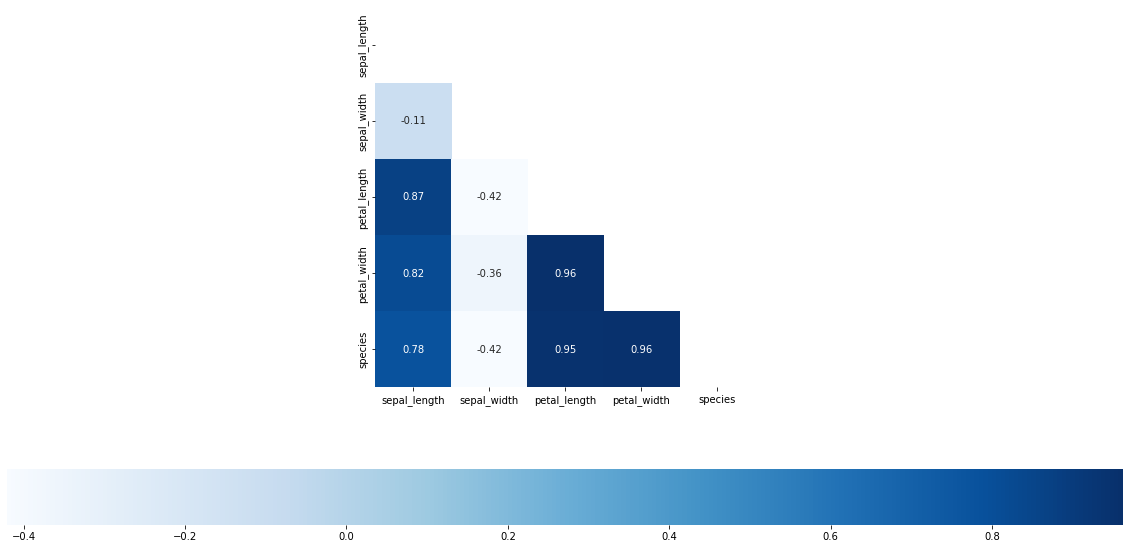

In [12]:
plt.figure(figsize=(20, 10))
correlation = dataframe.corr()
matrix = np.triu(correlation)
sns.heatmap(correlation, cmap='Blues', square=True, cbar=True, cbar_kws={ 'orientation': 'horizontal' }, annot=True, fmt='.2f', mask=matrix)

For this case scenario, with 4 features, removing three of them, that'd be the stupidest move, even more if we take into account that this is not a conventional dataset, it's actually made to only have important features

## Target distribution

We're working with classification, multilabel classification, each label should have the same amount of values, evenly distribution (balanced) is a key step for a good classifier.

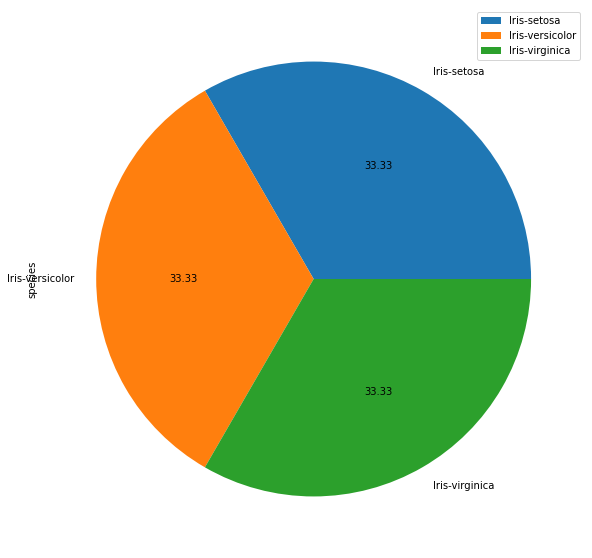

In [13]:
plt.figure(figsize=(10, 10))
dataframe['species'].map(lambda x: target_dict[x]).value_counts().plot.pie(autopct='%.2f')
plt.legend()

## Outliers detection

Values out of the scope, they're good, but can add noise at times to our model, or to consfuse it even

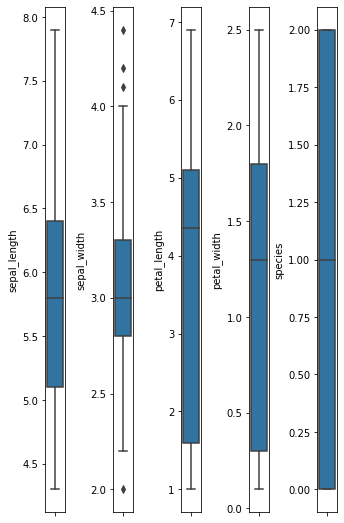

In [14]:
fig, axes = plt.subplots(1, len(dataframe.columns), figsize=(5, 7.5))
for index, col in enumerate(dataframe.columns):
  sns.boxplot(data=dataframe, y=col, ax=axes[index])
plt.tight_layout(pad=1.5, w_pad=.5, h_pad=.5)

## Sepal identification

How much does the sepal explain the species it identifies as

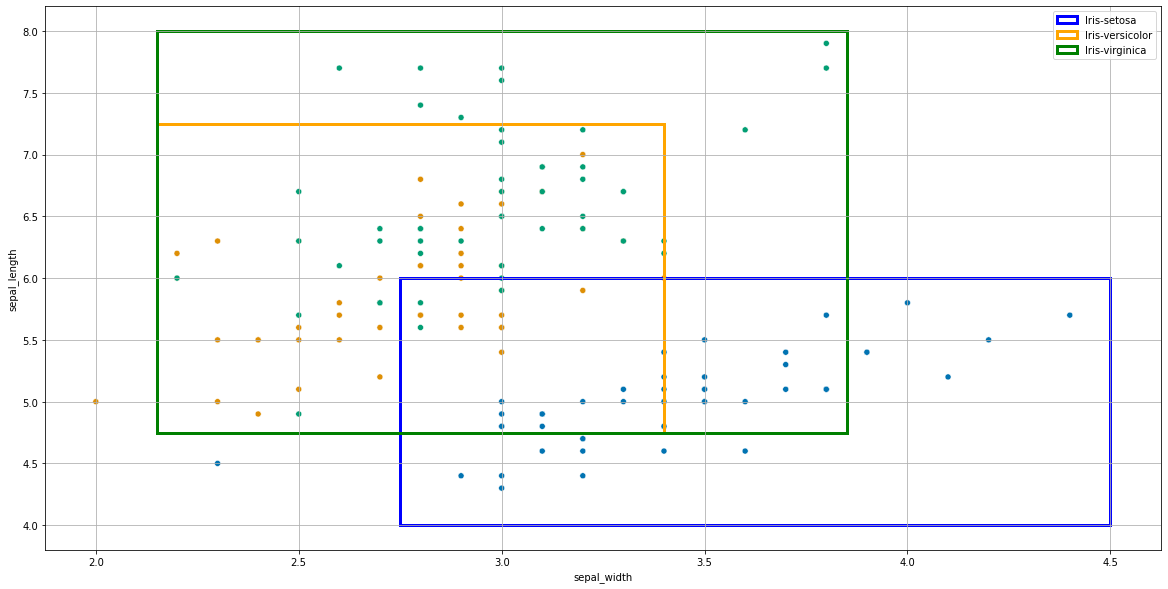

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()

rect = ax.add_patch(patches.Rectangle((2.75, 4), 1.75, 2, linewidth=3, edgecolor='blue', facecolor='none'))
rect = ax.add_patch(patches.Rectangle((2.15, 4.75), 1.25, 2.5, linewidth=3, edgecolor='orange', facecolor='none'))
rect = ax.add_patch(patches.Rectangle((2.15, 4.75), 1.7, 3.25, linewidth=3, edgecolor='green', facecolor='none'))

sns.scatterplot(
  data=dataframe,
  x='sepal_width',
  y='sepal_length',
  hue='species',
  palette=sns.color_palette('colorblind', len(dataframe.species.unique())),
  markers='species',
  ax=ax,
)
plt.legend(target_names)

The sepal does give some insight, but, on it's own, would be too confusing, or not clear enough.

It only, clear helps identify the setosa species

## Petal identification

How much does the petal explain the species it identifies as

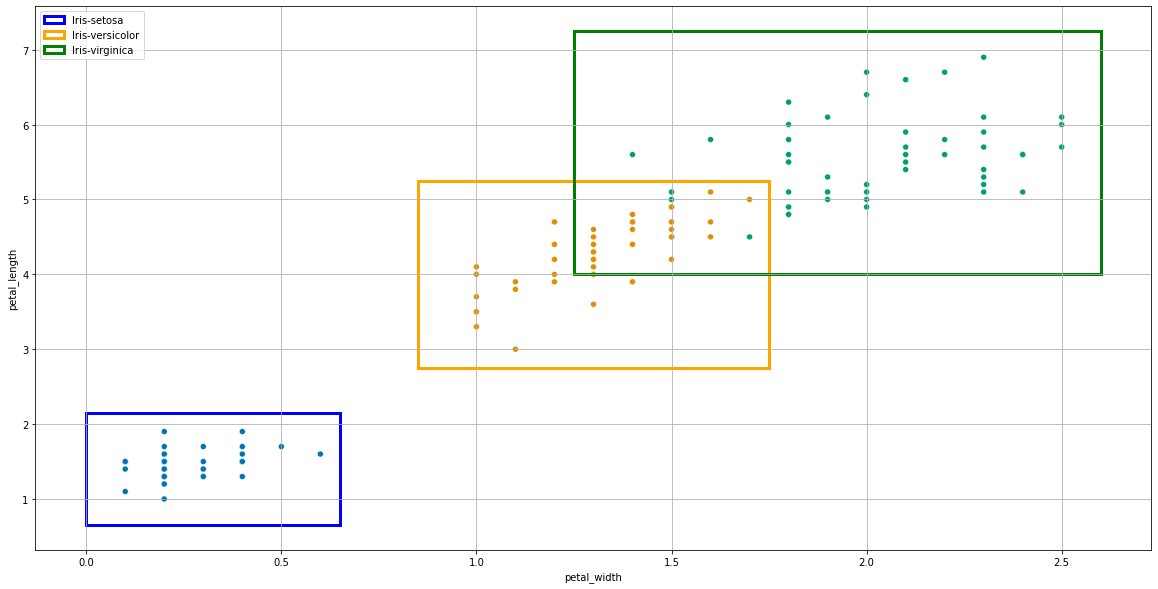

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()

rect = ax.add_patch(patches.Rectangle((0, .65), 0.65, 1.5, linewidth=3, edgecolor='blue', facecolor='none'))
rect = ax.add_patch(patches.Rectangle((.85, 2.75), .9, 2.5, linewidth=3, edgecolor='orange', facecolor='none'))
rect = ax.add_patch(patches.Rectangle((1.25, 4), 1.35, 3.25, linewidth=3, edgecolor='green', facecolor='none'))

sns.scatterplot(
  data=dataframe,
  x='petal_width',
  y='petal_length',
  hue='species',
  palette=sns.color_palette('colorblind', len(dataframe.species.unique())),
  markers='species',
  ax=ax,
)
plt.legend(target_names)

Meanwhile, the petal does throw a much clearer identification, with versicolor and virginica barely crossing paths, but, most of the occurences being clearly distintinctive from each other

# Data Science

Actually preparing the data for the model and the last adjustments before the algorithmic session

In [17]:
FIX_IMBALANCEMENT = True #@param {type:'boolean'}
USE_UNDERSAMPLER = False #@param {type:'boolean'}
USE_OVERSAMPLER = True #@param {type:'boolean'}

## Assignment

Creating the features and target variables

In [18]:
target = 'species'
ignore = [
  target,
  # 'sepal_width',
  # 'sepal_length',
]
features = [ col for col in dataframe.columns if col not in ignore ]

In [19]:
X = dataframe[features]
y = dataframe[target]

## Imbalancement

It's perfectly balanced, so need to worry about it

In [20]:
if FIX_IMBALANCEMENT:
  if USE_UNDERSAMPLER:
    from imblearn.under_sampling import RandomUnderSampler
    X, y = RandomUnderSampler(random_state=RANDOM_SEED).fit_resample(X, y)
  elif USE_UNDERSAMPLER:
    from imblearn.over_sampling import RandomOverSampler
    X, y = RandomOverSampler(random_state=RANDOM_SEED).fit_resample(X, y)

## Splitting

Creating a training and testing sets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=RANDOM_SEED, stratify=y, shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=5)

Let's see how they've splitted

In [22]:
X_train.shape, X_test.shape

((100, 4), (50, 4))

# Helpers

We'll need them later down the line

## Imports

Mostly metrics, but it's a good practice to be consistent with the structure

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

## Model creator

A very useful feature to standarize the model creation steps

In [24]:
from sklearn.pipeline import Pipeline, make_pipeline

def build_model(
  model,
  scaler = None,
  use_scaler=False,
) -> Pipeline:
  assert model is not None

  steps = []

  if scaler is None:
    scaler = MinMaxScaler()
    # scaler = RobustScaler()
    # scaler = StandardScaler()
  if use_scaler:
    steps.append(('scaler', scaler))

  steps.append(('model', model))

  return Pipeline(steps=steps)

## Confusion Matrix

It lets us know how much are we actually correctly predicting per label

In [25]:
def cmatrix(y_true: np.ndarray, y_pred: np.ndarray, target_names: List[str] = target_names) -> None:
  df_cm = confusion_matrix(y_true, y_pred)
  df_cm = df_cm.astype('float') / df_cm.sum(axis = 1)[:, np.newaxis]

  plt.figure(figsize=(20, 10))
  sns.heatmap(
    df_cm,
    square=True,
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=True,
    cbar_kws={ 'orientation': 'horizontal' },
    annot=True,
    # annot_kws={ 'fontsize': 16 },
  ).set(
    xlabel='Predicted Class',
    ylabel='Actual Class',
  )

  plt.show()

## Classification report

A useful set of metrics nicely presented to us

In [26]:
def creport(y_true: np.ndarray, y_pred: np.ndarray, target_names: List[str] = target_names) -> None:
  report = classification_report(y_true, y_pred, target_names=target_names)
  print(report)

## Area Under the Curve (AUC)

It's a metric to better help us examine the binary classification performance, even on one-vs-all classifiers

In [27]:
def auc(
  model: Pipeline = None,
  data: pd.DataFrame = X_test,
  y_true: np.ndarray = y_test,
  probs: np.ndarray = None
) -> float:
  assert model is not None or probs is not None

  if probs is None:
    probs = model.predict_proba(data)

  return roc_auc_score(y_true, probs, multi_class='ovo')

## Model evaluator

Let's also standarize the model's performance evaluation

In [28]:
def evaluate_performance(
  model,
  X_true: np.ndarray = X_test,
  y_true: np.ndarray = y_test,
) -> None:
  y_pred = model.predict(X_test)

  creport(y_true, y_pred)
  print('Balanced score', balanced_accuracy_score(y_true, y_pred))
  print('AUC score', auc(model, X_true, y_true))
  print('Overall score', model.score(X_true, y_true))

  cmatrix(y_true, y_pred)

# Algorithms

The "fun" part of any data science project, it is now time to put to use the data

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf_log = build_model(
  LogisticRegression(random_state=RANDOM_SEED),
  use_scaler=False
).fit(X_train, y_train)

Let's evaluate it's performance

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      0.94      0.91        17
 Iris-virginica       0.94      0.88      0.91        17

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50

Balanced score 0.9411764705882352
AUC score 0.9976931949250288
Overall score 0.94


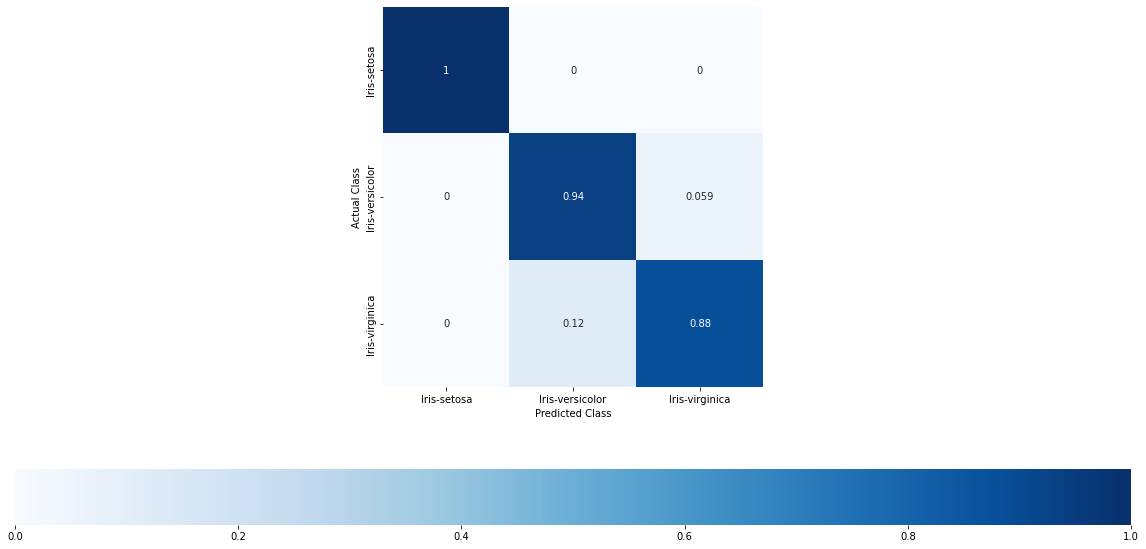

In [30]:
evaluate_performance(clf_log)

## XGBoost

In [31]:
from xgboost import XGBClassifier

clf_xgboost = build_model(
  XGBClassifier(
    random_state=RANDOM_SEED,
    max_depth=7,
    n_estimators=100,
    learning_rate=0.01,
  ),
  # use_scaler=True,
).fit(X_train, y_train)

Evaluation, once again

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        17

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

Balanced score 0.9803921568627452
AUC score 0.9873125720876587
Overall score 0.98


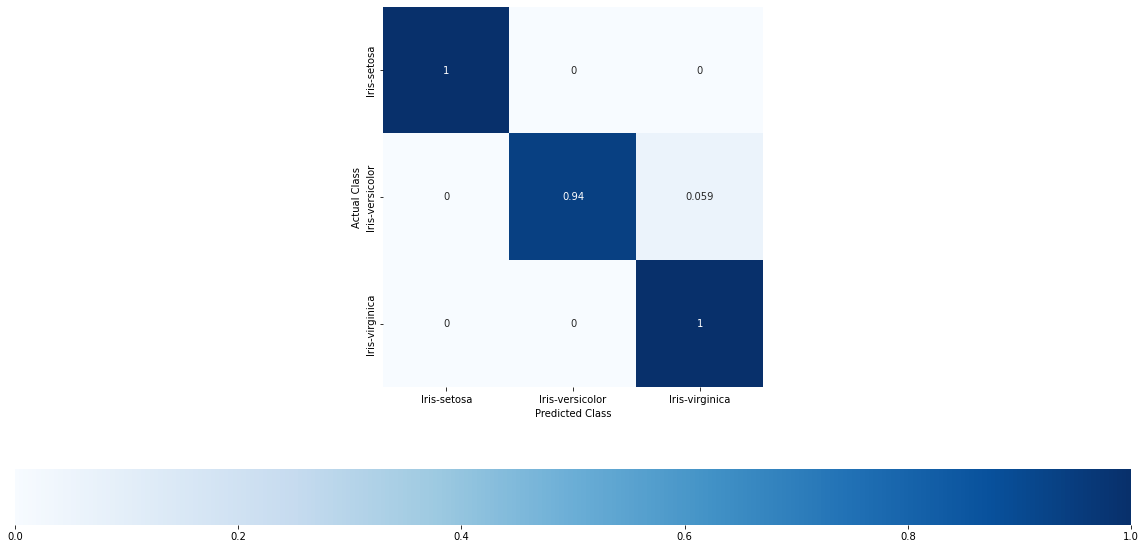

In [32]:
evaluate_performance(clf_xgboost)

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = build_model(
  RandomForestClassifier(
    random_state=RANDOM_SEED,
    max_depth=3,
    n_estimators=20,
  ),
  use_scaler=True
).fit(X_train, y_train)

Evaluation, the two thrones

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.80      0.94      0.86        17
 Iris-virginica       0.93      0.76      0.84        17

       accuracy                           0.90        50
      macro avg       0.91      0.90      0.90        50
   weighted avg       0.91      0.90      0.90        50

Balanced score 0.9019607843137255
AUC score 0.9907006920415226
Overall score 0.9


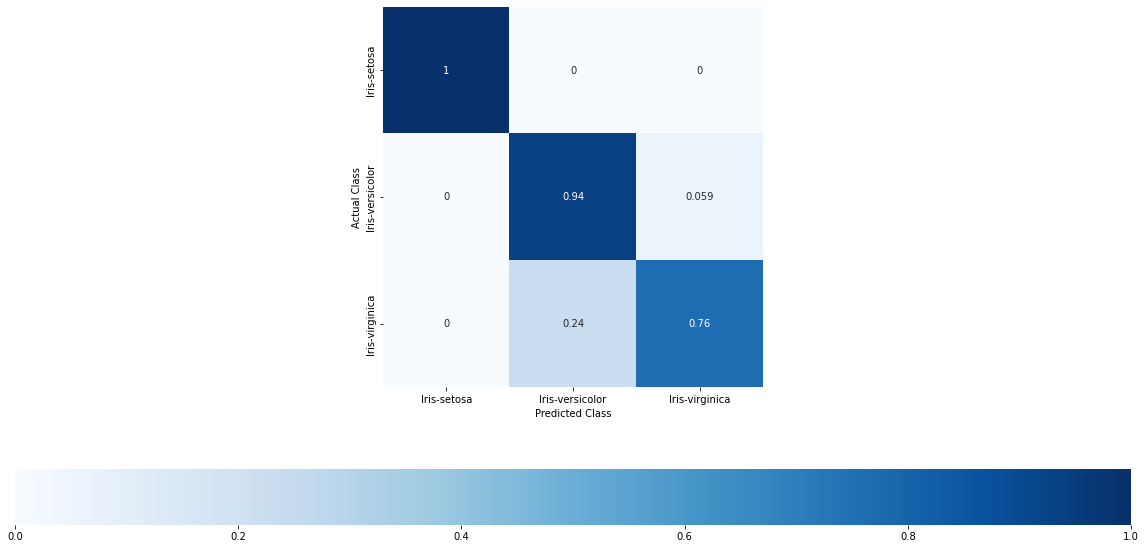

In [34]:
evaluate_performance(clf_rf)

## Decision Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = build_model(
  DecisionTreeClassifier(random_state=RANDOM_SEED),
).fit(X_train, y_train)

Evaluation and the desolation of Smaug

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.82      0.90        17
 Iris-virginica       0.85      1.00      0.92        17

       accuracy                           0.94        50
      macro avg       0.95      0.94      0.94        50
   weighted avg       0.95      0.94      0.94        50

Balanced score 0.9411764705882352
AUC score 0.9558823529411765
Overall score 0.94


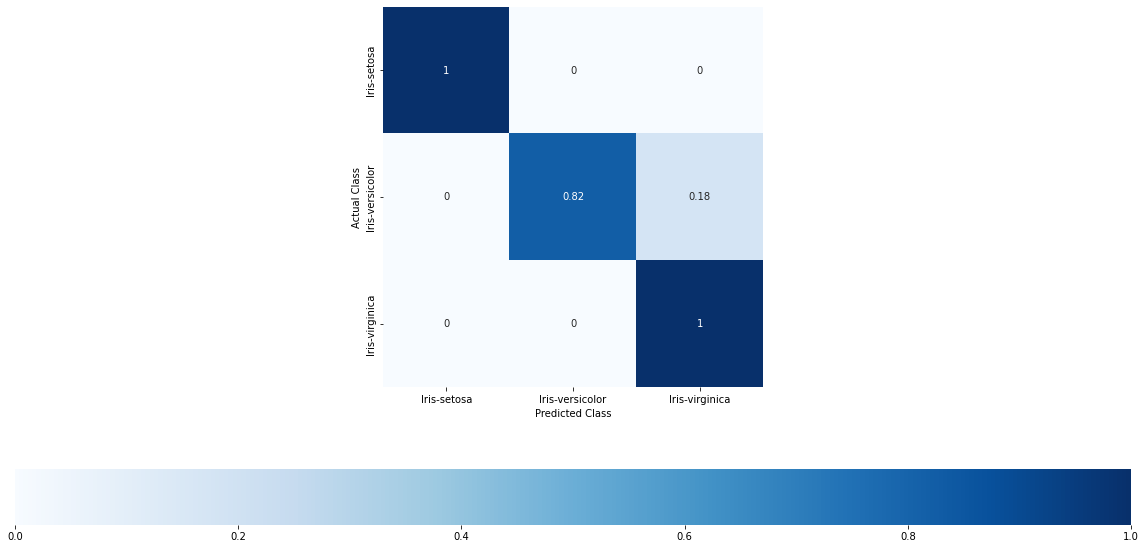

In [36]:
evaluate_performance(clf_tree)

### Explanation

Not that the other algorithms can't be explained, up to a certain degree obviously, but none of them gets as clear as the decission tree

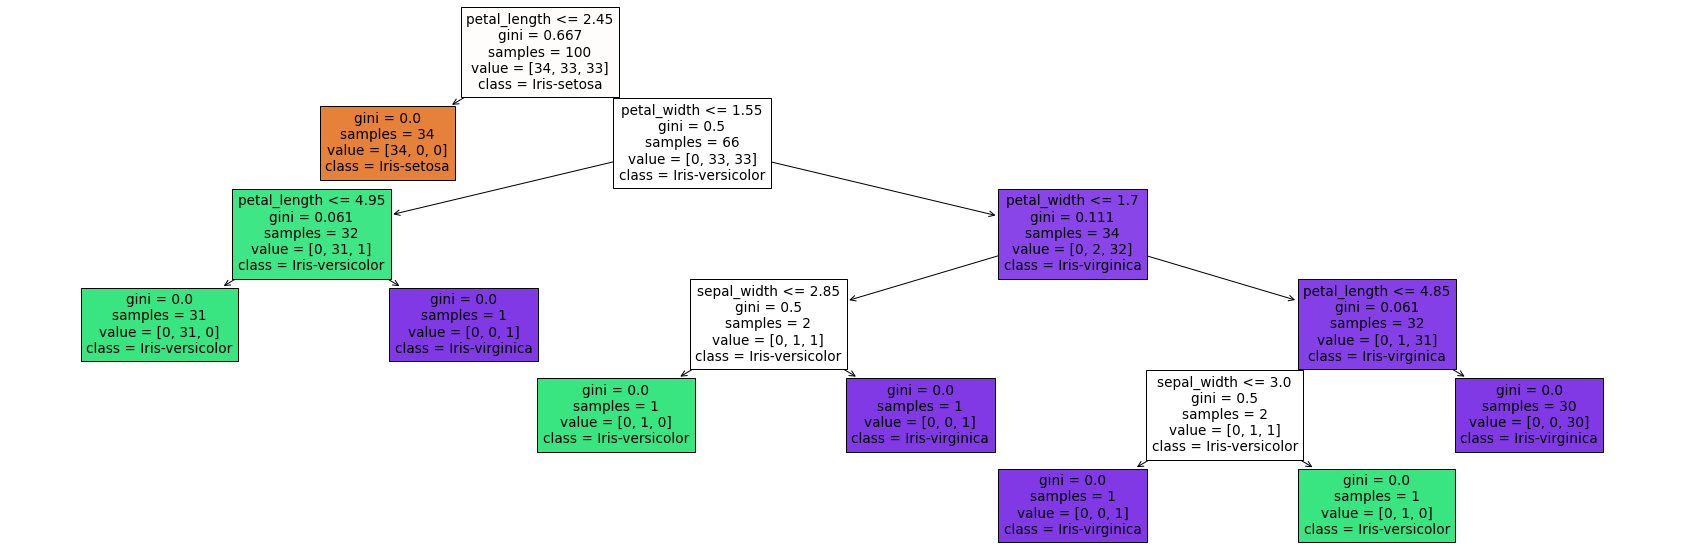

In [37]:
from sklearn import tree

figure =plt.figure(figsize=(30, 10))
tree_plot = tree.plot_tree(clf_tree['model'], feature_names=features, class_names=target_names, filled=True)
figure.savefig('/content/decission_tree.png', bbox_inches='tight')

## K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = build_model(
  KNeighborsClassifier(
    # n_neighbors=1,
    # n_neighbors=2,
    # n_neighbors=15,
    n_neighbors=5,
  ),
).fit(X_train, y_train)

Evaluation, the battle of the five armies

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

Balanced score 0.9803921568627452
AUC score 0.9971164936562861
Overall score 0.98


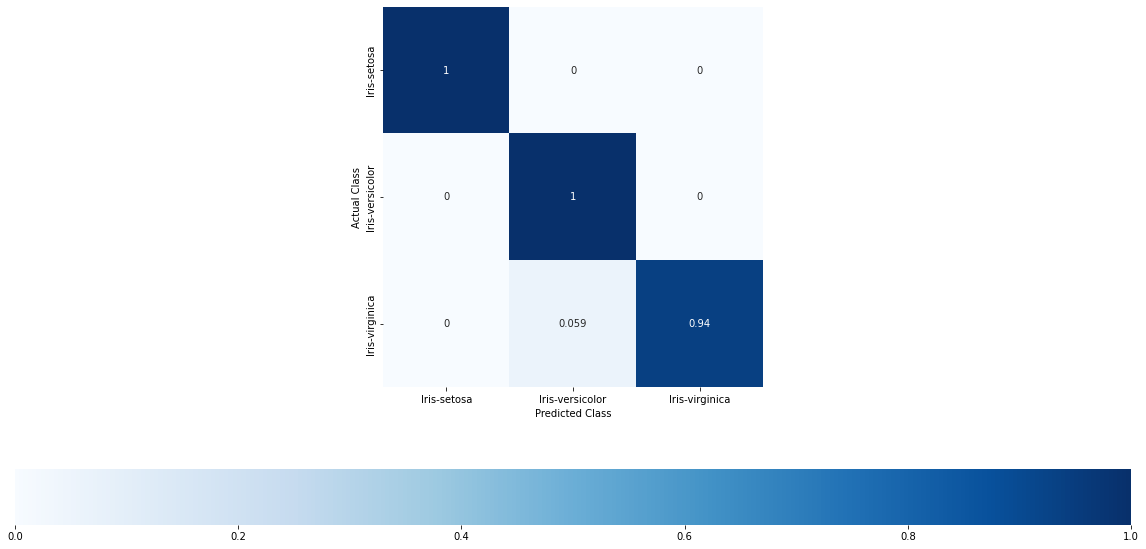

In [39]:
evaluate_performance(clf_knn)

### Best number of neighbors

Given that we're working with KNN, we must determine which amount of neighbors is actually the best, for that, we can just run out some tests to see it's evolution

In [40]:
best_neighbors = []
for n_neighbors in range(1, min(X_train.shape[0], 100)):
  neighbors_score = build_model(
    KNeighborsClassifier(n_neighbors=n_neighbors),
  ).fit(X_train, y_train).score(X_test, y_test)

  best_neighbors.append([n_neighbors, neighbors_score])
df_best_neighbors = pd.DataFrame(best_neighbors, columns=['neighbors', 'score'])

And now we plot it

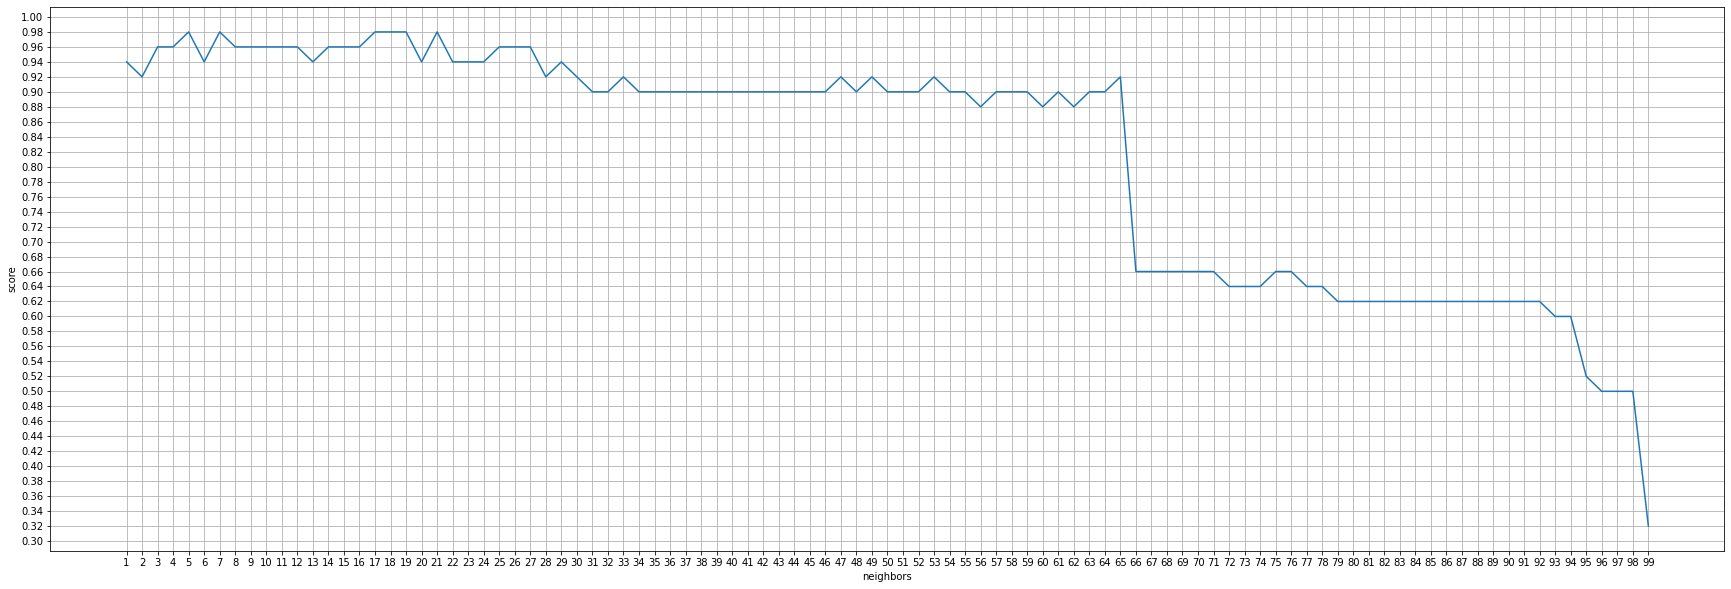

In [41]:
plt.figure(figsize=(30, 10))
plt.grid()
plt.xticks(range(1, 100))
plt.yticks(np.array(range(0, 101, 2)) / 100)
sns.lineplot(data=df_best_neighbors, x='neighbors', y='score')

## Support Vector Machine

In [42]:
from sklearn.svm import SVC

clf_svc = build_model(
  SVC(C=2.0, probability=True),
  use_scaler=False,
).fit(X_train, y_train)

Evaluation, silmarillion

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

Balanced score 1.0
AUC score 1.0
Overall score 1.0


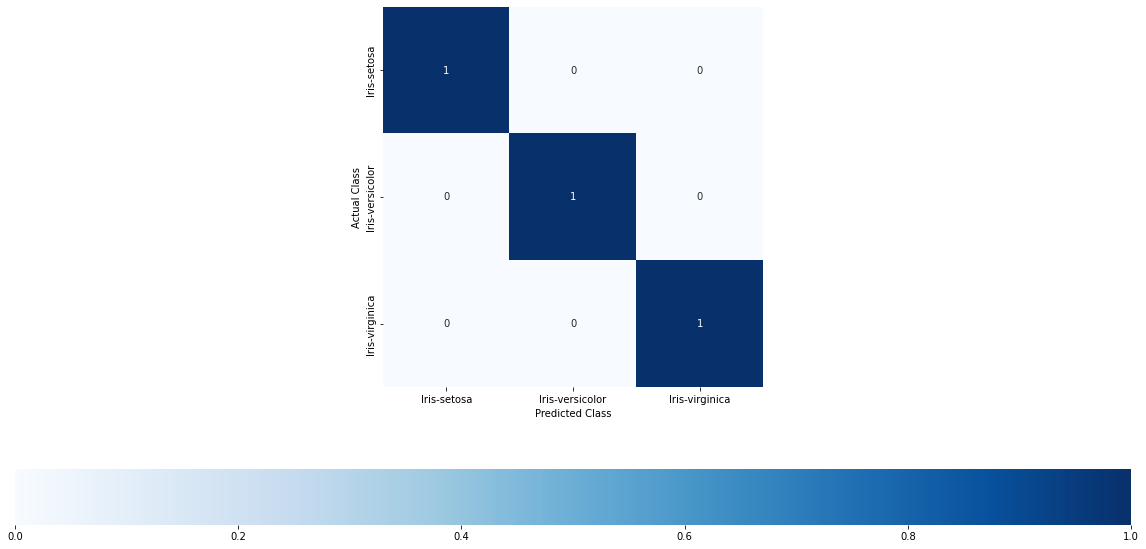

In [43]:
evaluate_performance(clf_svc)

## LightGBM

In [44]:
from lightgbm import LGBMClassifier

clf_lgbm = build_model(
  LGBMClassifier(random_state=RANDOM_SEED, max_depth=7, n_estimators=250),
  use_scaler=True,
).fit(X_train, y_train)

You really don't want to know about this evaluation's title

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.76      0.94      0.84        17
 Iris-virginica       0.92      0.71      0.80        17

       accuracy                           0.88        50
      macro avg       0.89      0.88      0.88        50
   weighted avg       0.89      0.88      0.88        50

Balanced score 0.8823529411764706
AUC score 0.994232987312572
Overall score 0.88


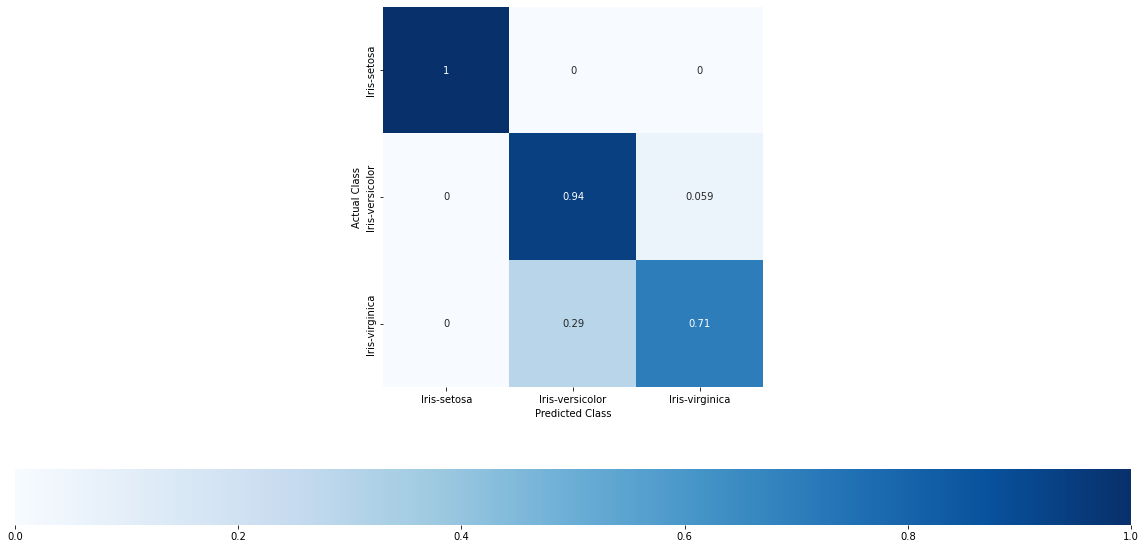

In [45]:
evaluate_performance(clf_lgbm)

# Conclusions

This dataset is a gift, it's explicitly made to provide a good score, perfectly balanced from the go, and with good correlated features.

But having so little samples can make that our score bumps up and down depending on the seed. I'll sacrifice that extra score as to have a consistent output, just for this example.

But, as with any other project, data is most important that the tuning you can do and research.

And for once, having a balanced from the get go is such a minor (not really) detail to have taken into account, it's one thing less to focus on.

I'd say it's overall a nice starting project, I won't say rigged, but datasets are not usually this clean and balanced, with features that actually contribute to the target's explainability.

## Credits

- https://www.kaggle.com/code/midouazerty/iris-data-with-98-accuracy-score

# The end

And that's all folks! SVC had the highest score, but if you're starting out, use this dataset as a model benchmarking.